In [1]:
# ============================================================================
# TRABAJO PRACTICO FINAL - METODO DE ENSAMBLE (GRADIENT BOOSTING) - TITANIC
# Sistemas de Soporte para la Toma de Decisiones
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_auc_score, RocCurveDisplay)
import joblib



In [2]:
# ============================================================================
# 1. CARGA DE DATOS
# ============================================================================

print("="*80)
print("1. CARGANDO DATOS DEL TITANIC")
print("="*80)

# Rutas de los archivos
ruta_train = r"..\data\dataset_train.csv"
ruta_test = r"..\data\dataset_test.csv"

# Cargar datasets
df_train = pd.read_csv(ruta_train)

print(f"\nDimensiones del conjunto de entrenamiento: {df_train.shape}")

print("\nPrimeras 5 filas:")
print(df_train.head())



1. CARGANDO DATOS DEL TITANIC

Dimensiones del conjunto de entrenamiento: (891, 9)

Primeras 5 filas:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  IsAlone
0         0       3    1  22.0      1      0   7.2500           2        0
1         1       1    0  38.0      1      0  71.2833           2        0
2         1       3    0  26.0      0      0   7.9250           1        1
3         1       1    0  35.0      1      0  53.1000           2        0
4         0       3    1  35.0      0      0   8.0500           1        1


In [3]:
# ============================================================================
# 2. DIVISION DE DATOS (Train 80% / Test 20%)
# ============================================================================

print("\n" + "="*80)
print("4. DIVISION DE DATOS")
print("="*80)

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain: {X_train.shape} - Test: {X_test.shape}")
print("Distribución en Train:", y_train.value_counts().to_dict())
print("Distribución en Test: ", y_test.value_counts().to_dict())



4. DIVISION DE DATOS

Train: (712, 8) - Test: (179, 8)
Distribución en Train: {0: 439, 1: 273}
Distribución en Test:  {0: 110, 1: 69}


In [4]:
# ============================================================================
# 3. ENTRENAMIENTO DEL METODO DE ENSAMBLE
# ============================================================================

print("\n" + "="*80)
print("5. ENTRENAMIENTO GRADIENT BOOSTING")
print("="*80)

gb_model = GradientBoostingClassifier(
    n_estimators=200,       # más árboles mejora rendimiento
    learning_rate=0.05,    # learning rate bajo mejora generalización
    max_depth=3,           # profundidad típica recomendada
    random_state=42
)

gb_model.fit(X_train, y_train)

print("\nModelo entrenado exitosamente")




5. ENTRENAMIENTO GRADIENT BOOSTING

Modelo entrenado exitosamente


In [5]:
# ============================================================================
# 4. EVALUACION DEL MODELO
# ============================================================================

print("\n" + "="*80)
print("6. EVALUACION DEL MODELO")
print("="*80)

# Predicciones
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)
y_test_proba = gb_model.predict_proba(X_test)[:,1]

# Metricas en Train
print("\nMETRICAS EN TRAIN:")
print(f"  Accuracy:  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"  Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"  Recall:    {recall_score(y_train, y_train_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_train, y_train_pred):.4f}")

# Metricas en Test
print("\nMETRICAS EN TEST:")
print(f"  Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_test_pred):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_test_proba):.4f}")

# Reporte de clasificacion
print("\nREPORTE DE CLASIFICACION (Validacion):")
print(classification_report(y_test, y_test_pred, 
                          target_names=['No sobrevivio', 'Sobrevivio']))



6. EVALUACION DEL MODELO

METRICAS EN TRAIN:
  Accuracy:  0.9143
  Precision: 0.9344
  Recall:    0.8352
  F1-Score:  0.8820

METRICAS EN TEST:
  Accuracy:  0.8156
  Precision: 0.8214
  Recall:    0.6667
  F1-Score:  0.7360
  ROC-AUC:   0.8136

REPORTE DE CLASIFICACION (Validacion):
               precision    recall  f1-score   support

No sobrevivio       0.81      0.91      0.86       110
   Sobrevivio       0.82      0.67      0.74        69

     accuracy                           0.82       179
    macro avg       0.82      0.79      0.80       179
 weighted avg       0.82      0.82      0.81       179




IMPORTANCIA DE CARACTERISTICAS (Gradient Boosting):
      Feature  Importance
1         Sex    0.468450
5        Fare    0.175011
0      Pclass    0.149903
2         Age    0.148653
6  FamilySize    0.041540
3       SibSp    0.015099
4       Parch    0.001126
7     IsAlone    0.000216


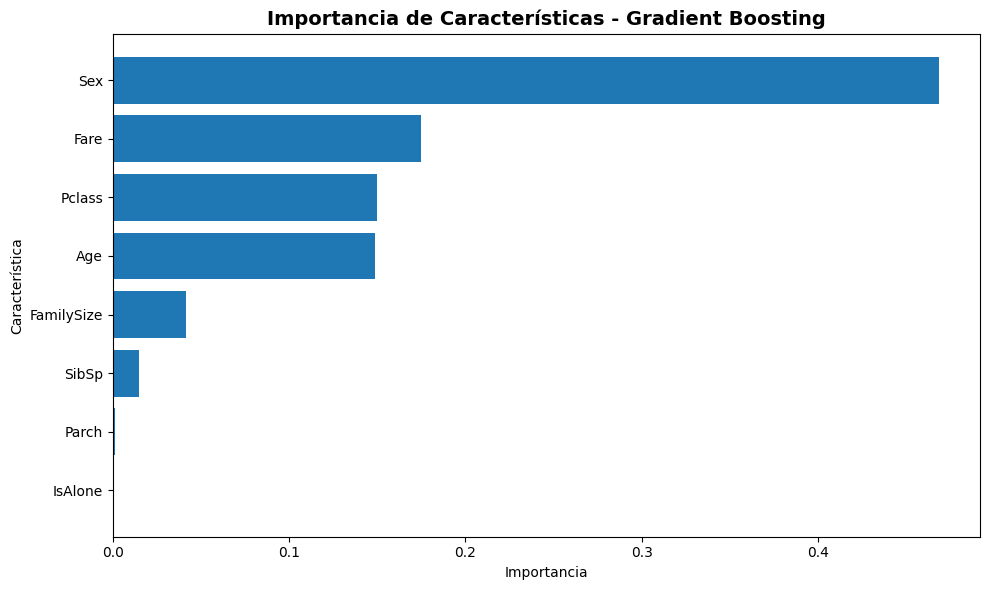


✓ Importancia de features guardada: gradient_boosting_feature_importance.png


In [6]:
# ============================================================================
# 5. VISUALIZACIONES - IMPORTANCIA DE CARACTERISTICAS (Gradient Boosting)
# ============================================================================

# Obtener importancias de características
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nIMPORTANCIA DE CARACTERISTICAS (Gradient Boosting):")
print(feature_importance)

# Gráfico de importancia
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][::-1], feature_importance['Importance'][::-1])
plt.title('Importancia de Características - Gradient Boosting', fontsize=14, fontweight='bold')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.savefig('gradient_boosting_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Importancia de features guardada: gradient_boosting_feature_importance.png")

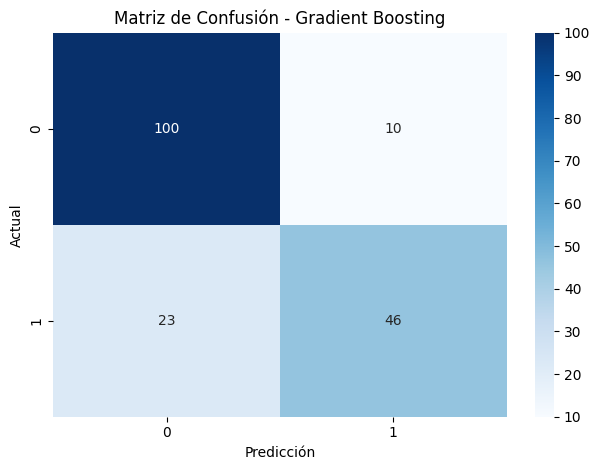


Gráfico guardado: cm_gradient_boosting.png


In [7]:
# ============================================================================
# 6. MATRIZ DE CONFUSIÓN
# ============================================================================

cm = confusion_matrix(y_test, y_test_pred)
# plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Gradient Boosting")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("cm_gradient_boosting.png", dpi=150)
plt.show()

print("\nGráfico guardado: cm_gradient_boosting.png") 


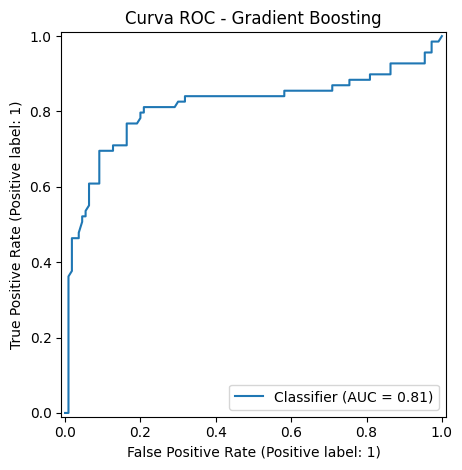


Gráfico guardado: roc_gradient_boosting.png


In [8]:
# ============================================================================
# 7. CURVA ROC
# ============================================================================

RocCurveDisplay.from_predictions(y_test, y_test_proba)
plt.title("Curva ROC - Gradient Boosting")
plt.tight_layout()
plt.savefig("roc_gradient_boosting.png", dpi=150)
plt.show()

print("\nGráfico guardado: roc_gradient_boosting.png")


In [9]:
# ============================================================================
# 8. GUARDAR MODELO
# ============================================================================

joblib.dump(gb_model, "modelo_gradient_boosting.joblib")
print("\nModelo guardado como: modelo_gradient_boosting.joblib")

print("\n" + "="*80)
print("PROCESO COMPLETADO EXITOSAMENTE")
print("="*80)



Modelo guardado como: modelo_gradient_boosting.joblib

PROCESO COMPLETADO EXITOSAMENTE
